# Appendix Overview

So you decided to click the link in my homework report, huh. Welcome! Here are the the appendices I referenced.

A note on GenAI: I used GenAI to write more efficient code for the functions, debug, and make small enhancements on what they do. I did not use GenAI to name the function, defined its parameter inputs, or write the stub (part in red) that explains what the function will do (these are all things I did). 

## Load python packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### Load victimization dataset into python

In [5]:
df = pd.read_stata("Victimization data - Assignment 4.dta") 

# Appendix 1: Determining Time Invariance

Discussion:

In [9]:
# Call function for determining time invariance within the dataset
time_invariant_table(df, "id", "wave")

,Variable,Time Invariant
0,victim,False
1,age,False
2,marital_status,True
3,race,True
4,sex,True
5,education,True
6,employed,True


In [7]:
# Code for the function used to determine time invariance
def time_invariant_table(df, identifier, time_periods):
    """
    Determine whether all the variables in a dataset are time variant or not.

    Parameters:
    df (pd.DataFrame): The dataset containing all variables.
    identifier (str): The column representing the unit of analysis (e.g., individual, organization, country).
    time_periods (str): The column representing time periods.

    Return:
    pd.Dataframe 
    with rows representing all the variables in a dataset, except the idetifier and time_period, 
    and column containing a boolean value, where true indicates variable is time invariant, and false if not time invariant
    """
    
    # Exclude identifier and time_periods columns
    variables = [col for col in df.columns if col not in [identifier, time_periods]]

    # Check time invariance for each variable
    invariance_status = {}

    for var in variables:
        unique_counts = df.groupby(identifier)[var].nunique().max()
        invariance_status[var] = unique_counts == 1 #returns a bool based on if unique_counts is equal to 1

    # Convert to DataFrame
    return pd.DataFrame(list(invariance_status.items()), columns=["Variable", "Time Invariant"])

In [8]:
# Test if the function works on sample data
data = {
    'id': [1, 1, 2, 2, 3, 3],
    'time': [2020, 2021, 2020, 2021, 2020, 2021],
    'income': [50000, 50000, 60000, 65000, 70000, 70000],
    'gender': ['M', 'M', 'F', 'F', 'M', 'M']
}

test1_df = pd.DataFrame(data)
result = time_invariant_table(test1_df, 'id', 'time')
print(result)


# Example Usage
data2 = {
    'id': [1, 1, 2, 2, 3, 3],
    'time': [2020, 2021, 2020, 2021, 2020, 2021],
    'income': [50000, 50000, 60000, 60000, 70000, 70000],
    'gender': ['M', 'M', 'F', 'M', 'M', 'M']
}

test2_df = pd.DataFrame(data2)
result2 = time_invariant_table(test2_df, 'id', 'time')
print(result2)

  Variable  Time Invariant
0   income           False
1   gender            True
  Variable  Time Invariant
0   income            True
1   gender           False


# Appendix 2: Verifying the Dataset is Balanced

Discussion

### Tests with the original dataset

In [10]:
# Count unique IDs
unique_ids = list(df['id'].value_counts())
print("Total number of people interviewed':", len(unique_ids))

Total number of people interviewed': 92867


In [11]:
# Count the total number of people interviewed at all 4 waves
wave_count = df.groupby(["id"])["wave"].count()
at_least_4 = list(wave_count[wave_count == 4].index)
print("Total number of people who were interviewed at all 4 waves:", len(at_least_4))

Total number of people who were interviewed at all 4 waves: 92867


In [32]:
# Call function for determining whether dataset is perfectly balanced (4 waves for each individual)
balanced = identifier_measured_4_times(df, "id", "wave")
print(balanced)

True


In [31]:
# Code for the function used to determine whether the dataset is balanced
def identifier_measured_4_times(df, identifier, time_periods):
    """
    Determine whether all the identifiers in a dataset have observations for all 4 time periods.
    
    Parameters:
    df (pd.DataFrame): The dataset containing all variables.
    identifier (str): The column representing the unit of analysis (e.g., individual, organization, country).
    time_periods (str): The column representing time periods.
    
    Returns:
    bool: True if all identifiers are measured at all 4 time periods, False otherwise.
    """
    # Get the unique count of time periods for each identifier
    counts = df.groupby(identifier)[time_periods].nunique()
    
    # Check if all identifiers have exactly 4 unique time periods
    return counts.eq(4).all()

In [14]:
# Test if the function works on sample data
data = {
    'id': [1, 1, 1, 1, 2, 2, 2, 2],
    'time': [2020, 2021, 2022, 2023, 2020, 2021, 2022, 2023],
    'income': [50000, 50000, 50000, 50000, 70000, 70000, 70000, 70000],
    'gender': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F']
}

test1_df = pd.DataFrame(data)
result = identifier_measured_4_times(test1_df, 'id', 'time')
print(result)


# Example Usage
data2 = {
    'id': [1, 1, 1, 1, 2, 2, 2],
    'time': [2020, 2021, 2022, 2023, 2020, 2021, 2022],
    'income': [50000, 50000, 50000, 50000, 70000, 70000, 70000],
    'gender': ['M', 'M', 'M', 'M', 'F', 'F', 'F']
}

test2_df = pd.DataFrame(data2)
result2 = identifier_measured_4_times(test2_df, 'id', 'time')
print(result2)

True
False


### Tests with the dataset with no missing values

In [33]:
# Counting NaN values in all columns
nan_count = df.isna().sum()
print(nan_count)

id                   0
wave                 0
victim               0
age                  0
marital_status      96
race                 0
sex                  0
education          308
employed          1772
dtype: int64


In [34]:
#drop observations with any missing values (at least one variable has an NaN value)
df1 = df.dropna()

In [35]:
# Number of missing values in the new df1 dataset (should be zero for all the variables)
nan_count1 = df1.isna().sum()
print(nan_count1)

id                0
wave              0
victim            0
age               0
marital_status    0
race              0
sex               0
education         0
employed          0
dtype: int64


In [36]:
# Count unique IDs in the new df1 dataset
unique_ids = list(df1['id'].value_counts())
print("Total number of people interviewed':", len(unique_ids))

Total number of people interviewed': 92405


In [37]:
# Count the total number of people interviewed at all 4 waves in the new df1 dataset
wave_count = df1.groupby(["id"])["wave"].count()
at_least_4 = list(wave_count[wave_count == 4].index)
print("Total number of people who were interviewed at all 4 waves:", len(at_least_4))

Total number of people who were interviewed at all 4 waves: 92405


In [38]:
# Call function for determining whether dataset is perfectly balanced (4 waves for each individual) in the new df1 dataset
balanced = identifier_measured_4_times(df1, "id", "wave")
print(balanced)

True


## Appendix 3: Age

In [39]:
# Call function to determine whether age increases by 1 year across each observation for each individual
does_age_increase_by_1(df1, "id", "age", "wave")

True

In [27]:
def does_age_increase_by_1(df, identifier, age, time_period):
    """
    Check each identifier to see if their age increases by 1 between each of the time periods.

    Parameters:
    df (pandas.df) = dataframe containing the data
    identifier (str) = column name for the identifier (unit of analysis)
    age (str) = column name for the age value for each identifier at each time period
    time_period (str) = column name for the time period variable

    Retuns: Bool
    where true = all individuals in the dataset have their age increase by one year across each consecutive time period and false otherwise
    """
    
    # Sort the dataframe by identifier and time_period to ensure chronological order
    df = df.sort_values(by=[identifier, time_period])
    
    # List to store identifiers that do not meet the criteria
    invalid_identifiers = []
    
    # Iterate over each unique identifier
    for ident in df[identifier].unique():
        # Filter the rows for the current identifier
        identifier_df = df[df[identifier] == ident]
        
        # Iterate through the rows of the filtered dataframe
        is_valid = True
        for i in range(1, len(identifier_df)):
            if identifier_df[age].iloc[i] - identifier_df[age].iloc[i-1] != 1:
                is_valid = False
                break
        
        if not is_valid:
            invalid_identifiers.append(ident)
    
    return len(invalid_identifiers) == 0

In [28]:
# Example usage:
data = {
    'id': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'age': [20, 21, 22, 30, 31, 32, 12, 13, 14],
    'time_period': [1, 2, 3, 1, 2, 3, 1, 2, 3]
}

df1 = pd.DataFrame(data)

# Check for identifiers where age does not increase by 1 between time periods
result = does_age_increase_by_1(df1, identifier='id', age='age', time_period='time_period')
print(result)

True


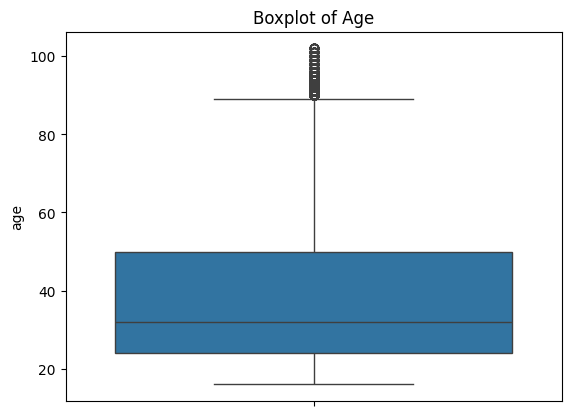

In [40]:
# Create a boxplot of the 'age' column
sns.boxplot(y=df1["age"])

# Add a title
plt.title("Boxplot of Age")

# Show the plot
plt.show()

In [41]:
# Summary statistics for 'age'
summary = df1["age"].describe()
summary

count    369620.000000
mean         38.085141
std          17.749679
min          16.000000
25%          24.000000
50%          32.000000
75%          50.000000
max         102.000000
Name: age, dtype: float64